In [13]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import unidecode
#from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
#import plotly.express as px
from collections import Counter
%matplotlib inline
import pandas_profiling

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
data=pd.read_csv("train.csv")

In [20]:
data.head()

,text,sentiment
0,"oh Marly, I`m so sorry!! I hope you find her...",neutral
1,Playing Ghost Online is really interesting. Th...,positive
2,is cleaning the house for her family who is co...,neutral
3,gotta restart my computer .. I thought Win7 wa...,neutral
4,SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...,neutral


In [21]:
data.dropna
data.describe()

,text,sentiment
count,27447,27448
unique,27410,3
top,#NAME?,neutral
freq,38,11106


In [27]:
data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['text'].head()

0    oh marly, i`m so sorry!! i hope you find her s...
1    playing ghost online is really interesting. th...
2    is cleaning the house for her family who is co...
3    gotta restart my computer .. i thought win7 wa...
4    see wat i mean bout foll0w friidays... it`s ca...
Name: text, dtype: object

In [29]:
data['text'] = data['text'].apply(lambda x : ' '.join([word for word in str(x).split() if not word in set(stopwords.words('english'))]))

In [31]:
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in str(x).split()]))

In [34]:
from textblob import TextBlob
data['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0          oh mary, i`m sorry!! hope find soon!! <3 <3
1    playing ghost online really interesting. new u...
2           cleaning house family coming later today..
3    gutta start computer .. thought wine supposed ...
4    see wat mean bout follow friday... it`s called...
Name: text, dtype: object

In [35]:
# remove !, ,, . , numbers 
def clean_tweets(tweet):
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    return tweet
data['text'] = data['text'].apply(clean_tweets)

In [36]:
def tokenize(text):
    return word_tokenize(text)
data['tokenized'] = data['text'].apply(tokenize)
data.head()

,text,sentiment,tokenized
0,oh marly im sorry hope find soon,neutral,"[oh, marly, im, sorry, hope, find, soon]"
1,playing ghost online really interesting new up...,positive,"[playing, ghost, online, really, interesting, ..."
2,cleaning house family comming later today,neutral,"[cleaning, house, family, comming, later, today]"
3,gotta restart computer thought win supposed p...,neutral,"[got, ta, restart, computer, thought, win, sup..."
4,see wat mean bout follw friidays its called lo...,neutral,"[see, wat, mean, bout, follw, friidays, its, c..."


In [39]:

# 10 most common words
words = Counter()
for idx in data.index:
    words.update(data.loc[idx, "tokenized"])
words.most_common(10)

[('im', 3051),
 ('day', 2339),
 ('good', 1548),
 ('get', 1513),
 ('like', 1370),
 ('go', 1335),
 ('got', 1226),
 ('its', 1206),
 ('dont', 1199),
 ('love', 1195)]

Normal words


(-0.5, 799.5, 499.5, -0.5)

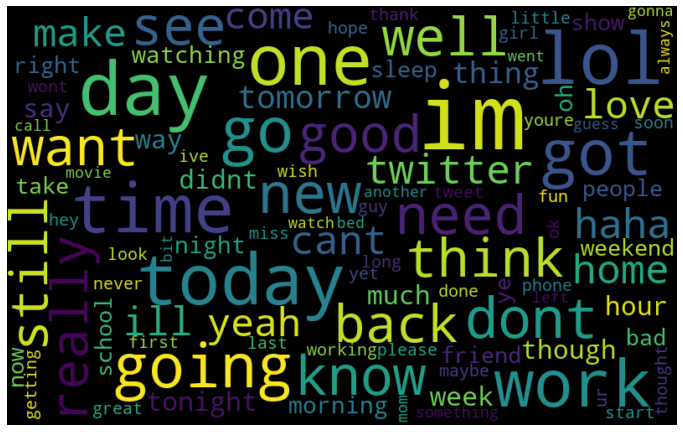

In [42]:
from wordcloud import WordCloud
normal_words = ' '.join([word for word in data['text'][data['sentiment'] == 'neutral']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit_transform(data['text'].values.astype('U'))
# summarize
(vectorizer.vocabulary_)
(vectorizer.idf_)
# encode document
vector = vectorizer.transform(data['text'].values.astype('U'))
# summarize encoded vector
print(vector.shape)
print(vector.toarray())
X=vector.astype('float')
print(X)

(27448, 27036)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (0, 21797)	0.3162070206251641
  (0, 21743)	0.34568573858189866
  (0, 16882)	0.2952183087689947
  (0, 14772)	0.6560606792411362
  (0, 11985)	0.20374522885446314
  (0, 10394)	0.30132044778594186
  (0, 7848)	0.361440029651946
  (1, 25437)	0.16864997174560215
  (1, 24926)	0.21535013173182127
  (1, 23475)	0.2489221830004439
  (1, 19277)	0.1388011267990436
  (1, 18177)	0.19859418760621636
  (1, 17860)	0.5229448058041616
  (1, 17039)	0.207668314325738
  (1, 16269)	0.1436461081542092
  (1, 15149)	0.32583663079445696
  (1, 13277)	0.32583663079445696
  (1, 12796)	0.18537469512660937
  (1, 12285)	0.22056055594822227
  (1, 8826)	0.2678993916517712
  (1, 6391)	0.2870602960992158
  (1, 3450)	0.1332621227477536
  (2, 23802)	0.25285988628557904
  (2, 13615)	0.36324393999835486
  (2, 10483)	0.34598101887149424
  :	:
  (27444, 5141)	

In [44]:
data.sentiment[data.sentiment == 'positive'] = 1
data.sentiment[data.sentiment == 'neutral'] = 0
data.sentiment[data.sentiment == 'negative'] = 2
y=data['sentiment'].astype('float')
print(y)

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
27443    2.0
27444    2.0
27445    1.0
27446    0.0
27447    1.0
Name: sentiment, Length: 27448, dtype: float64


In [46]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon,uniform,randint

#Sklearn imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_val_predict,validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0) #Basic train_test_split works here
y_test.shape

(6862,)

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [49]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred=svc.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2212  246  248]
 [ 626 1458   63]
 [ 758  102 1149]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.82      0.70      2706
         1.0       0.81      0.68      0.74      2147
         2.0       0.79      0.57      0.66      2009

    accuracy                           0.70      6862
   macro avg       0.74      0.69      0.70      6862
weighted avg       0.73      0.70      0.70      6862



In [53]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [54]:
y_pred=clf.predict(x_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.81      0.69      2706
         1.0       0.79      0.66      0.72      2147
         2.0       0.77      0.56      0.65      2009

    accuracy                           0.69      6862
   macro avg       0.72      0.68      0.69      6862
weighted avg       0.71      0.69      0.69      6862



In [61]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

In [63]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data['text'], data['sentiment'], train_size = 0.75, random_state=0, shuffle = True, stratify=data['sentiment'])

In [64]:

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X1_train)
X_train_counts.shape

(20586, 22425)

In [65]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(20586, 22425)

In [67]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(x_train,y_train);

In [69]:
y_pred=rf.predict(x_test)
#errors = abs(y_pred - y_test)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67      2706
         1.0       0.73      0.67      0.70      2147
         2.0       0.71      0.54      0.61      2009

    accuracy                           0.66      6862
   macro avg       0.68      0.65      0.66      6862
weighted avg       0.67      0.66      0.66      6862

